## **Archisha Sinha**

## Domain: Cryptography and Network Security
## Topic: STEGANOGRAPHY

#**STEGANOGRAPHY**
###Create a program that can hide secret messages within images or audio files using steganography techniques.

###Project Description:
Steganography is the art of concealing information within seemingly innocent data, such as images. In this Python project, we explore the concept of steganography using the Pillow library. The goal of this project is to hide a text message within an image and extract it later without arousing suspicion.

##**Importing the necessary Libraries**

In [ ]:
#The Pillow library is a powerful Python imaging library (PIL) that is used for opening, manipulating, and saving various image file formats.
!pip install pillow

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

##**Text to Binary Conversion**:

The project starts by converting the text message to binary. Each character in the text is converted into its 8-bit binary representation.

In [ ]:
def text_to_binary(text):
    binary_message = ''.join(format(ord(char), '08b') for char in text)
    return binary_message

##**Hiding the Text:**

The binary message is then hidden within the least significant bits of the image's pixel values. By slightly modifying the RGB values of each pixel, we encode the binary message.

In [ ]:
def hide_text_in_image(image_path, text):
    binary_message = text_to_binary(text)
    binary_message += '1111111111111110'  # Adding a termination marker

    img = Image.open(image_path)
    width, height = img.size

    if len(binary_message) > width * height:
        print("Text is too large to be hidden in the given image.")
        return

    index = 0
    for y in range(height):
        for x in range(width):
            pixel = list(img.getpixel((x, y)))

            for color_channel in range(3):
                if index < len(binary_message):
                    pixel[color_channel] = pixel[color_channel] & ~1 | int(binary_message[index])
                    index += 1

            img.putpixel((x, y), tuple(pixel))

            if index >= len(binary_message):
                break

    img.save("stego_image.png")
    print("Text hidden successfully.")

     # Display the original and stego images
    plt.subplot(1, 2, 1)
    plt.imshow(Image.open(image_path))
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(Image.open("stego_image.png"))
    plt.title('Stego Image')

    plt.show()

##**Text Extraction:**

To extract the text, the program searches for the termination marker within the stego image. Once found, it extracts the binary message and converts it back to the original text.



In [ ]:
def extract_text_from_image(image_path):
    img = Image.open(image_path)
    width, height = img.size

    binary_message = ""
    termination_marker = '1111111111111110'  # Termination marker: To ensure proper message extraction,
                                                #we append a termination marker ('1111111111111110') to the binary message.

    for y in range(height):
        for x in range(width):
            pixel = list(img.getpixel((x, y)))

            for color_channel in range(3):
                binary_message += str(pixel[color_channel] & 1)

            # Check for the termination marker
            if binary_message[-16:] == termination_marker:
                break

        # Check for the termination marker
        if binary_message[-16:] == termination_marker:
            break

    binary_message = binary_message[:-16]  # Remove the termination marker
    binary_chunks = [binary_message[i:i+8] for i in range(0, len(binary_message), 8)]

    hidden_text = ''.join([chr(int(chunk, 2)) for chunk in binary_chunks])
    return hidden_text


##**Main Function**

Enter 'hide' to hide text or 'extract' to extract text: hide
Enter the path to the image: /content/SamplePNGImage_100kbmb.png
Enter the text to hide: "This world is a better place to live than any other. Let's not make it worse.
Text hidden successfully.


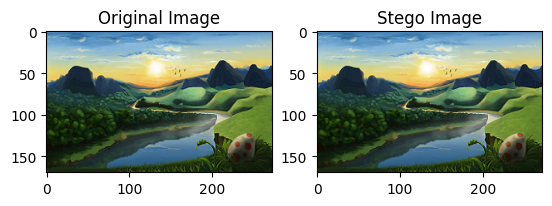

In [ ]:
if __name__ == '__main__':
    action = input("Enter 'hide' to hide text or 'extract' to extract text: ")
    if action == 'hide':
        image_path = input("Enter the path to the image: ")
        text = input("Enter the text to hide: ")
        hide_text_in_image(image_path, text)
    elif action == 'extract':
        image_path = input("Enter the path to the stego image: ")
        extracted_text = extract_text_from_image(image_path)
        print("Extracted text:", extracted_text)
    else:
        print("Invalid action. Please enter 'hide' or 'extract'.")

##**Conclusion:**

This steganography project demonstrates the basic principles of concealing and extracting text within images using Python and the Pillow library. While this project offers a simplified introduction to steganography, it highlights the power of encoding information within the least significant bits of pixel values. The ability to both hide and recover text from images showcases the concept's versatility and the importance of safeguarding hidden information.